<a href="https://colab.research.google.com/github/edsonportosilva/OptiCommPy/blob/main/examples/test_modulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test basic sequence generation functionalities

In [50]:
if 'google.colab' in str(get_ipython()):    
    ! git clone -b main https://github.com/edsonportosilva/OptiCommPy
    from os import chdir as cd
    cd('/content/OptiCommPy/')
    ! pip install . 

In [51]:
# from optic.comm.modulation import modulateGray, demodulateGray, grayMapping, detector
# from optic.comm.metrics import fastBERcalc, theoryBER
from optic.models.channels import awgn
from optic.dsp.core import pnorm, signal_power
from optic.plot import pconst, plotDecisionBoundaries, randomCmap, plotColoredConst
# from optic.utils import dB2lin
from optic.comm.sources import bitSource, symbolSource, prbsGenerator
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

In [52]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Test generation of pseudo-random bit sequences fixing numpy seeds

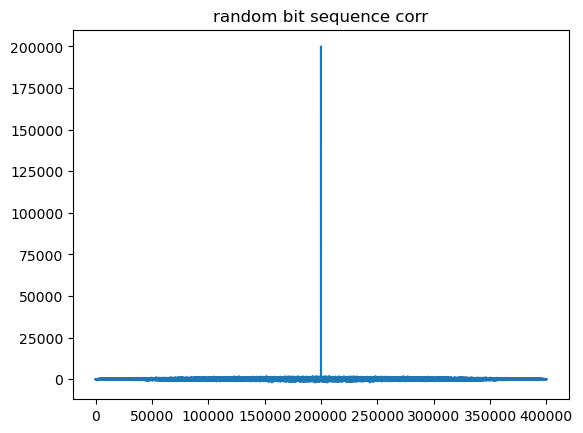

In [53]:
N = 200000
bits = bitSource(N, mode='random', seed=25)

x = 2*bits-1
u = signal.correlate(x,x)
plt.plot(u); plt.title('random bit sequence corr')
plt.show()

### Test PRBS  generation

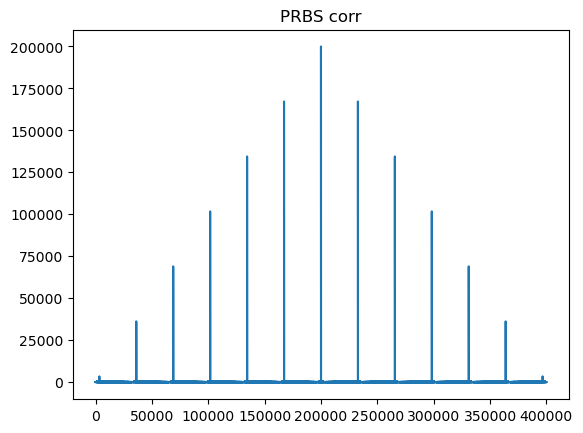

In [54]:
bits = bitSource(N, mode='prbs', order=15)

x = 2*bits-1
u = signal.correlate(x,x)
plt.plot(u); plt.title('PRBS corr')
plt.show()

### Test generation of symbol sequence with probabilistic shaping

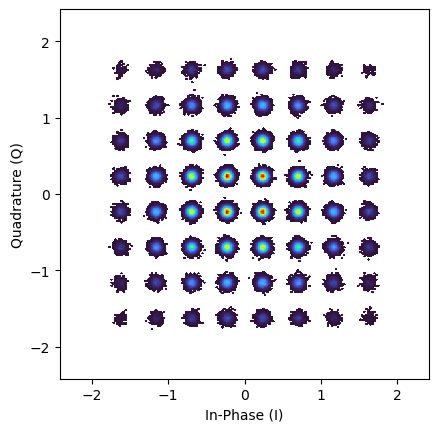

In [62]:
M = 64
length = 200000
symbTx = symbolSource(length, M, dist='maxwell-boltzmann', shapingFactor=0.05, seed=10)
SNRdB = 25

# AWGN    
EbN0dB = SNRdB - 10*np.log10(np.log2(M))
symbRx = awgn(symbTx, SNRdB)
pconst(symbRx, whiteb=True, R=1.05*np.max(np.abs(symbTx)));